Pair Programming Intro Regresión Lineal


En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).
El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:
Deberéis separar la X y la y.
Deberéis crear el train y el test.
Ajustar vuestro modelo.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
pd.options.display.max_columns=None

In [2]:
df = pd.read_csv("./Datos/coches_encoding_final.csv", index_col = 0)
df.head()

,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price_BOX,make_oe,Fuel_le,aspiration_le,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear
0,2.0,-1.063291,-0.263473,-0.518519,-1.514286,0.172709,4,0.347826,-0.285714,-0.272727,-0.333333,1.611061,13,1,0,1,0,0,0,0,0,0,1,1,0
1,2.0,-1.063291,-0.263473,-0.518519,-1.514286,0.172709,4,0.347826,-0.285714,-0.272727,-0.333333,1.611586,13,1,0,1,0,0,0,0,0,0,1,1,0
2,2.0,-0.316456,-0.119760,0.000000,-0.485714,0.535267,6,1.282609,-0.285714,-0.454545,-0.444444,1.611586,13,1,0,0,0,1,0,0,0,0,1,1,0
3,4.0,0.354430,0.203593,0.259259,0.057143,-0.105471,4,0.152174,0.428571,0.000000,0.000000,1.611153,16,1,0,0,0,0,1,0,0,1,0,1,0
4,4.0,0.303797,0.203593,0.333333,0.057143,0.536585,5,0.434783,0.428571,-0.545455,-0.888889,1.611721,16,1,0,0,0,0,1,0,1,0,0,1,0


In [3]:
#nos hemos dado cuenta que teniamos nulos y los vamos a quitar
df['num-of-doors']= df['num-of-doors'].fillna(df['num-of-doors'].median())

In [4]:
df['num-of-doors'].value_counts()

4.0    116
2.0     86
Name: num-of-doors, dtype: int64

In [5]:
df=df.astype({'num-of-doors': 'category'})

In [6]:
#separamos los datos
X = df.drop("price_BOX", axis = 1)
y = df['price_BOX']

In [7]:
#dividinmos los datos
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
#iniciamos la regresion lineal
lr= LinearRegression(n_jobs=-1)

In [9]:
#pasamos los datos de entrenamiento para que aprenda el algoritmo
lr.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [11]:
#hacemos las predicciones
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [12]:
#creamos los dataFrames
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
199,1.612275,1.611822,Train
38,1.609721,1.609738,Train
24,1.608623,1.608856,Train
122,1.612234,1.611867,Train
197,1.611923,1.612444,Train


In [13]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
199,1.612275,1.611822,Train,0.000453
38,1.609721,1.609738,Train,-0.000017
24,1.608623,1.608856,Train,-0.000233
122,1.612234,1.611867,Train,0.000367
197,1.611923,1.612444,Train,-0.000521


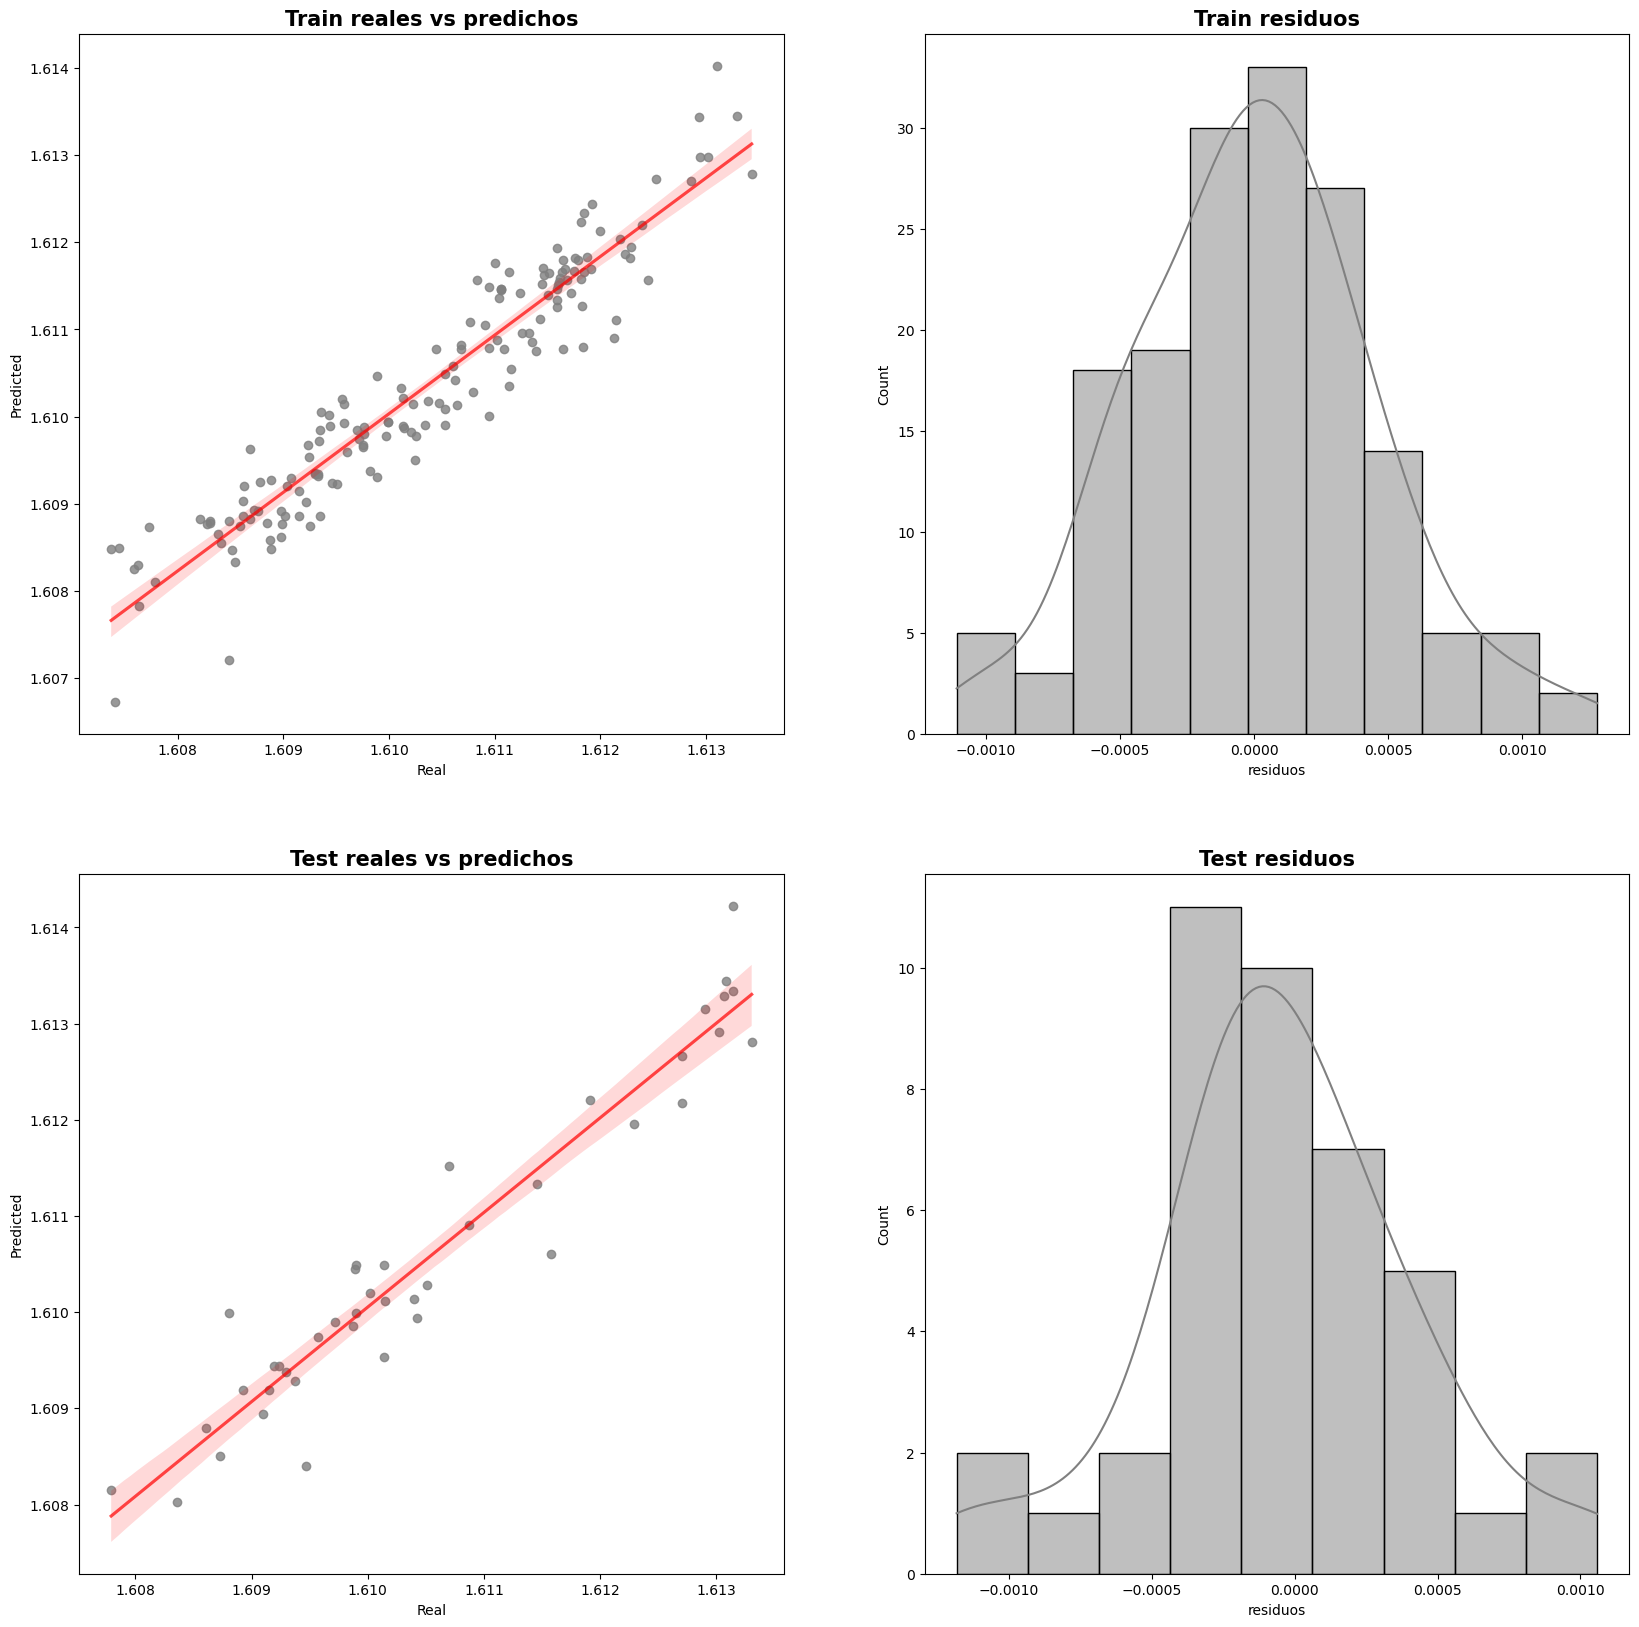

In [14]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [15]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-0.00095346 -0.00060356 -0.00071101 -0.00046193 -0.00055392 -0.00047608
 -0.00042703 -0.00040909 -0.0006192  -0.00045842]
Média métricas de validación cruzada: -0.0005673695773484878
